In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_excel("C:\\Users\\INTEL\\Downloads\\ex-4.xlsx", header = 1 )
df.head()

,Name,Age,Designation,Gender,Q1,Q2,Q3,Q4,Q5,Q6,...,Q11,Q12,Q13,Total,Average,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback
0,Jamarion,55,employe,Female,3,2,4,2,5,4,...,2,4,4,39,39.628378,9,7,6,7,10
1,Gabrielle,49,supervisor,Male,5,3,4,4,5,5,...,1,3,2,46,NaN,12,9,10,9,6
2,Savion,49,staff,Male,1,1,5,2,5,2,...,5,3,4,41,NaN,7,7,7,8,12
3,Trevin,26,manager,Male,3,3,4,3,2,3,...,3,3,1,41,NaN,10,5,8,11,7
4,Hailie,35,employe,Female,5,5,5,3,2,2,...,2,5,2,41,NaN,15,5,6,6,9


In [112]:
df.dtypes

Name                                 object
Age                                   int64
Designation                          object
Gender                               object
Q1                                    int64
Q2                                    int64
Q3                                    int64
Q4                                    int64
Q5                                    int64
Q6                                    int64
Q7                                    int64
Q8                                    int64
Q9                                    int64
Q10                                   int64
Q11                                   int64
Q12                                   int64
Q13                                   int64
Total                                 int64
Average                             float64
c1-General Working Environment        int64
c2-Work-Life Balance                  int64
c3-Employee Support and Benefits      int64
c4-Communication and Feedback   

In [113]:
df.isnull().sum()

Name                                  0
Age                                   0
Designation                           0
Gender                                0
Q1                                    0
Q2                                    0
Q3                                    0
Q4                                    0
Q5                                    0
Q6                                    0
Q7                                    0
Q8                                    0
Q9                                    0
Q10                                   0
Q11                                   0
Q12                                   0
Q13                                   0
Total                                 0
Average                             147
c1-General Working Environment        0
c2-Work-Life Balance                  0
c3-Employee Support and Benefits      0
c4-Communication and Feedback         0
c5-Communication and Feedback         0
dtype: int64

In [114]:
df.count()

Name                                148
Age                                 148
Designation                         148
Gender                              148
Q1                                  148
Q2                                  148
Q3                                  148
Q4                                  148
Q5                                  148
Q6                                  148
Q7                                  148
Q8                                  148
Q9                                  148
Q10                                 148
Q11                                 148
Q12                                 148
Q13                                 148
Total                               148
Average                               1
c1-General Working Environment      148
c2-Work-Life Balance                148
c3-Employee Support and Benefits    148
c4-Communication and Feedback       148
c5-Communication and Feedback       148
dtype: int64

In [136]:
df_1 = df.drop(['Age' , 'Name' , 'Designation' , 'Gender','Total' ,'Average' ,'c1-General Working Environment' ,'c2-Work-Life Balance' ,'c3-Employee Support and Benefits' ,'c4-Communication and Feedback' ,'c5-Communication and Feedback'] , axis = 1)
corr = df_1.corr()

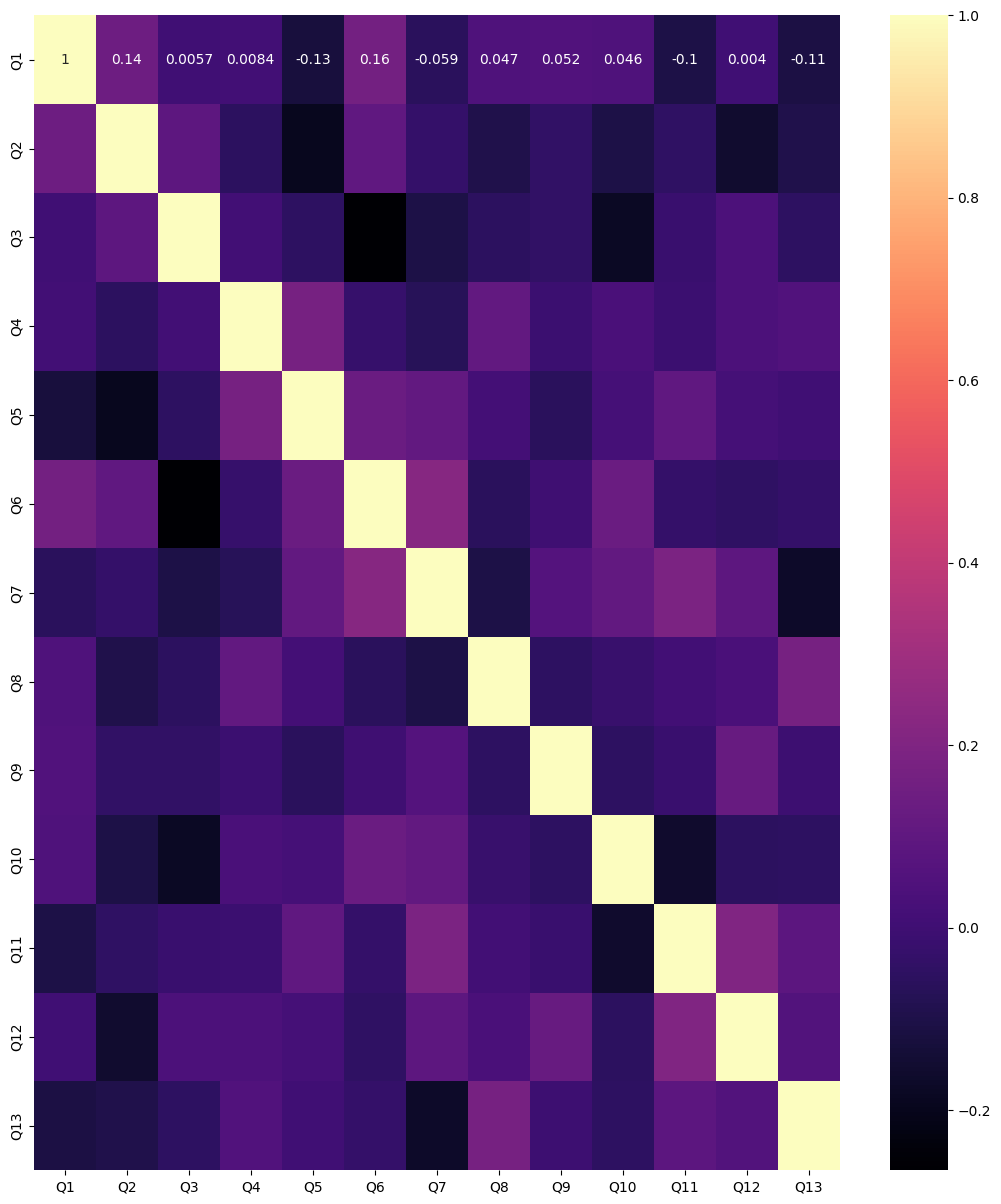

In [137]:
plt.figure(figsize=(13, 15))
sns.heatmap(corr, annot = True ,cmap = 'magma' )
plt.show()

In [138]:
data = df.drop(['Age' , 'Name' , 'Designation' , 'Gender','Total' ,'Average' ,'Q1' ,'Q2' ,'Q3' ,'Q4' ,'Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13'] , axis = 1)
data.head()

,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback
0,9,7,6,7,10
1,12,9,10,9,6
2,7,7,7,8,12
3,10,5,8,11,7
4,15,5,6,6,9


In [144]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
k_opt = 2
model = KMeans(n_clusters = k_opt , random_state = 42 , n_init = 10)
model.fit(scaled_df)

scaled_data = pd.DataFrame(scaled_data)
data['Satisfaction'] = model.labels_
data_res = pd.concat([df[['Name' , 'Age' , 'Designation','Gender' ]] , data] , axis = 1)
data_res.head()

,Name,Age,Designation,Gender,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback,Satisfaction
0,Jamarion,55,employe,Female,9,7,6,7,10,1
1,Gabrielle,49,supervisor,Male,12,9,10,9,6,1
2,Savion,49,staff,Male,7,7,7,8,12,1
3,Trevin,26,manager,Male,10,5,8,11,7,0
4,Hailie,35,employe,Female,15,5,6,6,9,0


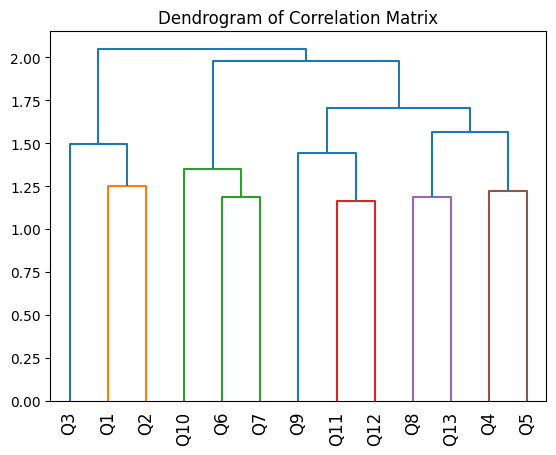

In [127]:
from scipy.cluster import hierarchy
linkage=hierarchy.linkage(corr,method='ward')
dendo=hierarchy.dendrogram(linkage,labels=corr.columns,orientation='top')
plt.xticks(rotation=90)
plt.title("Dendrogram of Correlation Matrix")
plt.show()

In [146]:
data[['c1-General Working Environment' ,'c2-Work-Life Balance' ,'c3-Employee Support and Benefits' ,'c4-Communication and Feedback' ,'c5-Communication and Feedback' ]].groupby(data['Satisfaction']).mean()


,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback
Satisfaction,,,,,
0,10.802817,4.774648,5.154930,8.901408,8.422535
1,7.701299,7.337662,6.597403,9.597403,9.844156


In [147]:
df['Designation'].groupby(data['Satisfaction']).count()

Satisfaction
0    71
1    77
Name: Designation, dtype: int64

In [149]:
df['Age'].groupby(data['Satisfaction']).max()

Satisfaction
0    54
1    55
Name: Age, dtype: int64

In [150]:
unsatisfied = data.where(data['Satisfaction'] == 0).dropna()
unsatisfied.head()

,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback,Satisfaction
3,10.0,5.0,8.0,11.0,7.0,0.0
4,15.0,5.0,6.0,6.0,9.0,0.0
8,9.0,7.0,4.0,8.0,8.0,0.0
10,12.0,4.0,8.0,9.0,12.0,0.0
13,12.0,4.0,7.0,8.0,8.0,0.0


In [156]:
unsatisfied[['c1-General Working Environment' ,'c2-Work-Life Balance' ,'c3-Employee Support and Benefits' ,'c4-Communication and Feedback' ,'c5-Communication and Feedback' ,'Satisfaction']].mean()

c1-General Working Environment      10.802817
c2-Work-Life Balance                 4.774648
c3-Employee Support and Benefits     5.154930
c4-Communication and Feedback        8.901408
c5-Communication and Feedback        8.422535
Satisfaction                         0.000000
dtype: float64

In [162]:
pos_count = []
for i in ['employe' , 'staff' , 'supervisor' , 'manager']:
    pos_count.append(unsatisfied['Designation'].where(unsatisfied['Designation'] == i).count())

pos_count = pd.DataFrame({'Designation' :['employe' , 'staff' , 'supervisor' , 'manager'] , 'Count': pos_count})
pos_count.head()

KeyError: 'Designation'

In [163]:
satisfied = data.where(data['Satisfaction'] == 1).dropna()
satisfied.head()

,c1-General Working Environment,c2-Work-Life Balance,c3-Employee Support and Benefits,c4-Communication and Feedback,c5-Communication and Feedback,Satisfaction
0,9.0,7.0,6.0,7.0,10.0,1.0
1,12.0,9.0,10.0,9.0,6.0,1.0
2,7.0,7.0,7.0,8.0,12.0,1.0
5,4.0,4.0,6.0,7.0,8.0,1.0
6,9.0,7.0,7.0,8.0,11.0,1.0


In [164]:
unsatisfied[['c1-General Working Environment' ,'c2-Work-Life Balance' ,'c3-Employee Support and Benefits' ,'c4-Communication and Feedback' ,'c5-Communication and Feedback','Satisfaction']].mean()

c1-General Working Environment      10.802817
c2-Work-Life Balance                 4.774648
c3-Employee Support and Benefits     5.154930
c4-Communication and Feedback        8.901408
c5-Communication and Feedback        8.422535
Satisfaction                         0.000000
dtype: float64

In [165]:
pos_count = []
for i in ['employe' , 'staff' , 'supervisor' , 'manager']:
    pos_count.append(satisfied['Designation'].where(satisfied['Designation'] == i).count())

pos_count = pd.DataFrame({'Designation' :['employe' , 'staff' , 'supervisor' , 'manager'] , 'Count': pos_count})
pos_count.head()

KeyError: 'Designation'